In [1]:
import numpy as np
from numpy import linalg as LA

## Linear Separator

In [2]:
X = np.array([[2, 1, 1, 100],
              [100, 1, 1, 2],
              [100, 0, 1, 2],
              [2, 0, 0, 100],
              [100, 0, 1, 2]])
y = np.array([-1, -1, -1, 1, 1]).reshape(-1, 1)

In [3]:
w1 = np.array([0, -2, -1, 0])
w2 = np.array([0, -2, 0, 0])
w3 = np.array([10, 10, 100, 100])
w4 = np.array([0, -4, -1, 0])
b1 = 2
b2 = 1
b3 = -1000
b4 = 3

Compute the norm-2 of each separator's weights and the linear classification outputs

Separator 1

In [4]:
print(LA.norm(w1))
print(X.dot(w1) + b1)

2.2360679775
[-1 -1  1  2  1]


Separator 2

In [5]:
print(LA.norm(w2))
print(X.dot(w2) + b2)

2.0
[-1 -1  1  1  1]


Separator 3

In [6]:
print(LA.norm(w3))
print(X.dot(w3) + b3)

142.126704036
[9130  310  300 9020  300]


Separator 4

In [7]:
print(LA.norm(w4))
print(X.dot(w4) + b4)

4.12310562562
[-2 -2  2  3  2]


We can see that the first two classifers has the highest accuracy and lowest norm-2 value of the weights.

## PCA

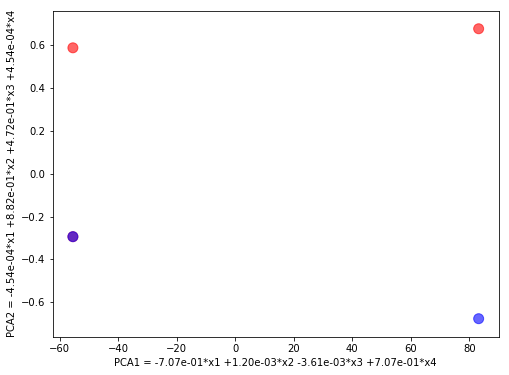

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# Set the colors for different classes
colors = ['red' if label ==-1 else 'blue' for label in y]
# Create a PCA object with 2 components
pca = PCA(n_components=2)
# Fit and transform the 4-dimensional data into a new 2-dimensional data
X_PCA = pca.fit_transform(X)
# Scatter plot the new 2D data, set alpha=0.6 in order to show the overlapping point
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors, alpha=0.6, s=100)
# Get the coordinates of the new 2 dimensions in original 4-dimension space
PCA1 = pca.components_[0, :]
PCA2 = pca.components_[1, :]
# Plot the definition (the expression) of the new 2 dimensions in the 2D plot
plt.xlabel("PCA1 = {:+.2e}*x1 {:+.2e}*x2 {:+.2e}*x3 {:+.2e}*x4".format(PCA1[0], PCA1[1], PCA1[2], PCA1[3]))
plt.ylabel("PCA2 = {:+.2e}*x1 {:+.2e}*x2 {:+.2e}*x3 {:+.2e}*x4".format(PCA2[0], PCA2[1], PCA2[2], PCA2[3]))
plt.show()

In [9]:
print("PCA1 = {:+}*x1 {:+}*x2 {:+}*x3 {:+}*x4".format(PCA1[0], PCA1[1], PCA1[2], PCA1[3]))
print("PCA2 = {:+}*x1 {:+}*x2 {:+}*x3 {:+}*x4".format(PCA2[0], PCA2[1], PCA2[2], PCA2[3]))

PCA1 = -0.7071016681876731*x1 +0.0012025364648884642*x2 -0.003607713745579882*x3 +0.7071016681876733*x4
PCA2 = -0.0004540164449235456*x1 +0.8816757722223222*x2 +0.47185529605410526*x3 +0.00045401644494138025*x4


Show the explained variance ratio of each new dimension, the higher the value is, the more important the new dimension is

In [10]:
pca.explained_variance_ratio_

array([  9.99927699e-01,   6.22194535e-05])

We can see that the first new dimension explained about 99% of the variance, so the first new dimension is the most important dimension.

As for the relevance of each new dimension to the original dimensions, we can conclude from the expression in part 2:

1. for dimension PCA1, the absolute value of the projection of each original dimension to this new dimension are: 0.7071016681876731, 0.0012025364648884642, 0.003607713745579882, 0.7071016681876733, which means the first and the fourth feature (original dimensions) are the most relevant to this new dimension.

2. for dimension PCA2, the absolute value of the projection of each original dimension to this new dimension are: 0.0004540164449235456, 0.8816757722223222, 0.47185529605410526, 0.00045401644494138025, which means the second feature is the most relevant to this new dimension, and the second relevant feature is the third feature.